In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
import random

In [ ]:
'''

    Sturm–Liouville task
    u'' + p(x) * u' + q(x) * u = phi(x)
    u(0) = u(l) = 0

    apply u' = w
    get system of ODEs:

    u' = w
    w' = -p(x) * w - q(x) * u + phi(x)

'''

In [31]:
l = 1

In [5]:
#p = lambda x: math.sin(x * math.pi / l)
p = lambda x: 1 / 2 / (1 + x)
q = lambda x: -(1 + 2*x) / 2 / (1+x)
phi = lambda x: (3 * math.cos(x) - (3 + 4 * x) * math.sin(x)) / 2 / math.sqrt(1 + x)

In [6]:
def ODEs(y, x, p, q, phi):
    u, w = y
    dydt = [w, -p(x) * w - q(x) * u + phi(x)]
    return dydt

In [7]:
y0 = [1.0, -13.627058659262445]
X = np.linspace(0, l, 101)
sol = odeint(ODEs, y0, X, args=(p, q, phi))

In [8]:
sol[-1][0]

-46360.14383207572

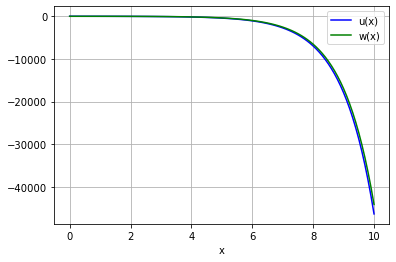

In [9]:
plt.plot(X, sol[:, 0], 'b', label='u(x)')
plt.plot(X, sol[:, 1], 'g', label='w(x)')
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

In [34]:
def res(ODEs, a, b, n, p, q, phi, optimization_parameter):
    print(optimization_parameter)
    y0 = [1.0, optimization_parameter]
    X = np.linspace(a, b, n)
    sol = odeint(ODEs, y0, X, args=(p, q, phi))
    #plt.plot(X, sol[:, 0], label='u(x)', linewidth=1.5)
    return sol[-1]


In [20]:
def SecantRootFinder(f, z0 : complex, eps=10e-4, maxIterations=1000):
    z = z0
    z_prev = z0 + 2 * eps
    for n in range(0, maxIterations):
        fz = f(z)
        if np.abs(fz) < eps:
            return z
        z, z_prev = z - fz / (fz - f(z_prev)) * (z - z_prev), z
    return None

In [22]:
def opr(arr):
    return (arr[0] - 2 * arr[1]) - 0.1704

1
1.002
3.937929698782927e-05
3.937929698782927e-05


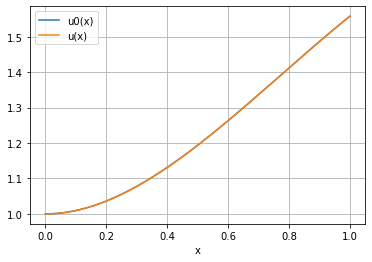

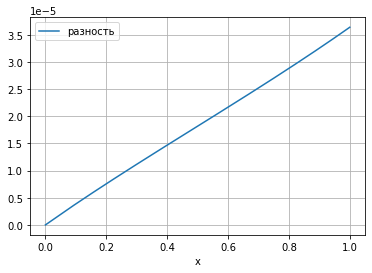

In [46]:
print(SecantRootFinder(lambda opt: opr(res(ODEs, 0, l, 1001, p, q, phi, opt)), 1, eps=10e-4))
xx = np.linspace(0, l, 1001)
u0 = np.sqrt(1 + xx) * np.sin(xx) + np.exp(-xx)
plt.plot(xx, u0, label = 'u0(x)')
y0 = [1.0, 3.937929698782927e-05]
X = np.linspace(0, l, 1001)
sol = odeint(ODEs, y0, X, args=(p, q, phi))
plt.plot(X, sol[:, 0], label='u(x)', linewidth=1.5)
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

plt.plot(X, sol[:, 0] - u0, label='разность', linewidth=1.5)
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

In [ ]:
'''

    ищем с помощью прямой
    прямую определяем по двум "выстрелам"
    находим b1 и b2 случайно в общем-то
    запускаем решение для них, получаем u1 и u2
    таким образом есть СЛАУ
    u1 = A * b1 + B
    u2 = A * b2 + B
    отсюда легко вывести
    A = (u1 - u2) / (b1 - b2)
    B = u1 - b1 * (u1 - u2) / (b1 - b2)
    тогда мы знаем прямую, можем решить уравнение
    u = 0 = A * b + B
    получаем
    b = - B / A = b1 - u1 * (b1 - b2) / (u1 - u2)

'''

In [44]:
optF = lambda opt: opr(res(ODEs, 0, l, 1001, p, q, phi, opt))
b1 = random.randrange(-10, 10)
b2 = random.randrange(-10, 10)
u1 = optF(b1)
u2 = optF(b2)
b = b1 - u1 * (b1 - b2) / (u1 - u2)
optF(b)

8
-3
3.949438454942111e-05


-2.6094620575456418e-08

In [25]:
def ComplexSecantRootFinder(f, z0 : complex, eps=10e-4, maxIterations=1000):
    z = z0
    z_prev = z0 + 2 * eps
    for n in range(0, maxIterations):
        fz = f(z)
        if np.abs(z - z_prev) < eps:
            return z
        z, z_prev = z - fz / (fz - f(z_prev)) * (z - z_prev), z
    return None

In [ ]:
def ComplexNewtonRootFinder(f, z0: complex, Df = None, eps=10e-4):
    if Df is None: Df = lambda z: (f(z+eps) - f(z-eps)) / (2 * eps)
    z = z0
    z_prev = z0 - 2 * eps
    while np.abs(z - z_prev) > eps:
        z_prev = z
        z = z - f(z)/Df(z)
    return z

In [23]:
ComplexSecantRootFinder(lambda x: 1, 1)

ZeroDivisionError: division by zero

In [28]:
ComplexSecantRootFinder(lambda x: x**3+1, 0.1)

0.09811144603816319

In [170]:
h = 0.05
N = int(l / h)
N

20

In [171]:
A = np.zeros((N, N))

for i in range(1, N-1):
    for j in range(1, N-1):
        xi = i * h
        o = p(xi) / (2 * h) + 1 / h ** 2
        if j == i - 1:
            A[i][j] = -o
        if j == i:
            A[i][j] = q(xi) - 2 / h ** 2
        if j == i + 1:
            A[i][j] = o

In [172]:
A[0][0] = q(0) - 2 / h ** 2
A[0][1] = 1 / h ** 2 + 1/(2*h) * p(0)

A[N-1][N-2] = 1 / h ** 2 - 1/(2*h) * p((N-1)*h)
A[N-1][N-1] = q((N-1)*h) - 2 / h ** 2

In [ ]:
A

In [174]:
np.linalg.cond(A)

1.7405739045964241

In [175]:
X = np.linspace(0, l, N)
X

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [176]:
u0 = 0
ul = 0

In [177]:
b = np.vectorize(phi)(X)
b[0] -= u0 * (1/h**2 - 1/(2*h) * p(0))
b[N-1] -= ul * (1/h**2 + 1/(2*h) * p((N-1)*h))
b

array([ 1.5       ,  1.37768441,  1.24793653,  1.11130636,  0.96836246,
        0.81969032,  0.66589082,  0.50757851,  0.34538004,  0.17993235,
        0.01188088, -0.1581222 , -0.32941994, -0.50135248, -0.67325901,
       -0.84447978, -1.01435802, -1.182242  , -1.347487  , -1.5094573 ])

In [178]:
A.shape, b.shape, N

((20, 20), (20,), 20)

In [179]:
#u = Ai.dot(np.vectorize(phi)(np.array([(i+1)*h for i in range(N-1)])))
u = np.linalg.solve(A, b)

In [180]:
u

array([-3.02181185e-03, -2.26903799e-03, -1.08393235e-03, -1.32921921e-03,
       -9.67251384e-04, -8.49226335e-04, -6.21212472e-04, -4.31892776e-04,
       -2.20442407e-04, -1.34181408e-05,  1.98915048e-04,  4.10909615e-04,
        6.22706989e-04,  8.30565459e-04,  1.02882725e-03,  1.20414112e-03,
        1.32593808e-03,  1.32169991e-03,  1.01822326e-03,  2.39044783e-03])

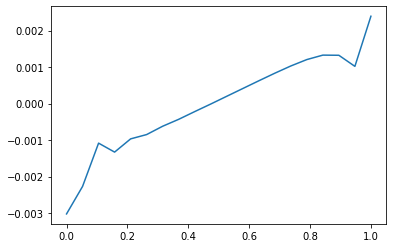

In [181]:
plt.plot(X, u)